In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.datasets import make_blobs

%matplotlib inline

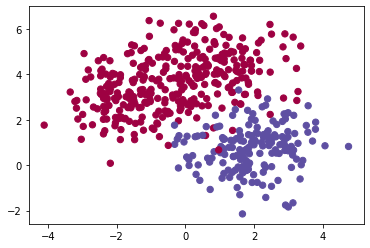

In [13]:
X, Y = make_blobs(500, n_features=2, random_state=0 , centers=None)

X, Y = X.T, Y.reshape(1, Y.shape[0])
#As we are performing binary classification the output labels are expected to  be either 0 or 1
Y = Y % 2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [14]:
print(X.shape, Y.shape)

(2, 500) (1, 500)


In [15]:
def layer_size(data, labels):
    n_x = data.shape[0]
    n_h = 4
    n_y = labels.shape[0]
    return (n_x, n_h, n_y)
    
#The "n_h" represents the number of nodes in the first hidden layer.
#The "n_x" represents the number of features in the input layer.
#The "n_y" represents the output layer node which is here 1.   
n_x, n_h, n_y = layer_size(X ,Y)

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


In [17]:
def initialize_parameters(n_x, n_h, n_y):
   
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    #In the neural network the weights are randomized instead of setting it to zero.
    #As if the weights are set to zero the model becomes symmentric thus there will be no weight updation during back propagation
    #The bias are set to zero
    #Here two weights and two bias are used as it is "Two layer neural network" as the input layer is not taken in representing it.
    #The W1,b1 are parameters of first hidden layer as we are performing logistic regression for classification
    #The W2,b2 are parameters of final output layer and these parameters are updated accordingly in back propagation
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y,1))

    #Here the assert function is used to check the shapes of the parameters.
    #Thus the shape of W1 will be number of nodes in next layer and number of nodes in present layer (hidden layer,input layer).
    #The shape of bias will be (hidden layer ,1) as it is row vector.
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    #The parameters is a dictionary which stores the parameters for performing forward propagation.
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


n_x, n_h, n_y = layer_size(X , Y)
parameters = initialize_parameters(n_x, n_h, n_y)
#The sample weights and bias  are displayed which will be used for propagation. 
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [19]:
def forward_propagation(X, parameters):
   
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    # The by using Vectorization method the value of Z1 , A1 , Z2 , A2 are calculated.
    # The Vectorization technique is used since it reduces the usages of for loop which are used to iterate in "m" training samples.
    # The non linear activation function is used for obtaining the values in corresponding nodes.


    # The "Z1" is output from input layer to the hidden layer , it is obtained my multiplying with parameters of weights and bias
    # The "A1" is the activation function (non-linear) such as sigmoid, tanh, ReLU , ect..
    # The "Z2" is the value obtained from hidden layer to the final output layer its shape will be a column vector
    # The "A2" is the activation for the final layer which is sigmoid as we are performing binary classification
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 =  1/(1 + np.exp(-Z2)) 
    
    #Thus "A2" is the predicted output or the y hat value which is used to calculate the loss function.
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

A2, cache = forward_propagation(X, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.007518715459095873 -0.007526730380732314 -0.0011613295644577978 0.4997096677134473


In [20]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
   
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    # As the cost function considered here is the loss function used for logistic regression technique
    # If the value Y=1 then the equation will be -(log(yhat)) and it must be as close to "1".
    # If the value Y=0 then the equation will be -(log (1-yhat)) and it should be as close as possible to "0".

    # In the loss function the error is calculated for single training samples.
    # Whereas in Cost function the error is calculated for the entire training samples.

    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost


print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 0.6925450467938092


In [21]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
   
    m = X.shape[1]
    
    # retrieve W1 and W2 from the dictionary "parameters".
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
        
    # Retrieve also A1 and A2 from dictionary "cache".
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    # In backward propagation the values of the parameters are updated and stores in dW1 , db1 , dW2 , db2.
    # In "dZ2" it is used to calculated values of predicted values "yhat" and the actual output "Y"
        
    dZ2 = A2-Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    # In the "dZ1" the value is obtained by multiplying the dot product of dZ2 and W2 with (1-A1)^2.
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00453579 -0.01158379]
 [ 0.00387249 -0.00989119]
 [-0.00236308  0.00602655]
 [-0.00981989  0.02502119]]
db1 = [[-0.00175313]
 [-0.00149236]
 [ 0.00091257]
 [ 0.00378062]]
dW2 = [[ 0.00117078  0.02706265 -0.00152269 -0.015777  ]]
db2 = [[0.16570967]]


In [22]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
   
    # Retrieve each parameter from the dictionary "parameters"
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    # The parameters are updated by the following formula.
    # The current value - alpha(learning rate) and updated parameters from backward propagation.
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00961052  0.01333787]
 [-0.02600895  0.02827214]
 [-0.01509865 -0.01564934]
 [ 0.01681268 -0.04247831]]
b1 = [[ 0.00210375]
 [ 0.00179083]
 [-0.00109509]
 [-0.00453675]]
W2 = [[-0.01198446 -0.04156525  0.00734177  0.04185448]]
b2 = [[-0.1988516]]


In [25]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
   
    
    np.random.seed(3)
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
  
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache =  forward_propagation(X, parameters)

        
        #Thus from the above forward function the "y hat or A2" has been predicted using the Logistic Regression
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
      
        
      
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692545
Cost after iteration 1000: 0.096893
Cost after iteration 2000: 0.093486
Cost after iteration 3000: 0.091514
Cost after iteration 4000: 0.087260
Cost after iteration 5000: 0.085420
Cost after iteration 6000: 0.084546
Cost after iteration 7000: 0.083975
Cost after iteration 8000: 0.083490
Cost after iteration 9000: 0.082912
W1 = [[ 1.39015286  0.06056714]
 [-0.71634841  1.20429076]
 [ 4.86901438 -4.87196916]
 [ 6.81157654  1.90418202]]
b1 = [[-4.16959169]
 [-2.93351835]
 [-3.0853774 ]
 [ 2.57033596]]
W2 = [[-3.73599125 -3.97913875  6.20290808  4.12379545]]
b2 = [[-3.62434243]]


In [26]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    
    return predictions

predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.34


In [29]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)



Cost after iteration 0: 0.692545
Cost after iteration 1000: 0.096893
Cost after iteration 2000: 0.093486
Cost after iteration 3000: 0.091514
Cost after iteration 4000: 0.087260
Cost after iteration 5000: 0.085420
Cost after iteration 6000: 0.084546
Cost after iteration 7000: 0.083975
Cost after iteration 8000: 0.083490
Cost after iteration 9000: 0.082912


In [30]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 96%
